# Authors: Merilin Silva, Luc Aggett
- All solutions of the non-programming part are in here


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.nn.functional import softmax

# From Token Embeddings to Probabilities (1 Point)

(0.16000000312924384,
 1.0399999998509883,
 0.055000001564621925,
 1.0449999999254942)

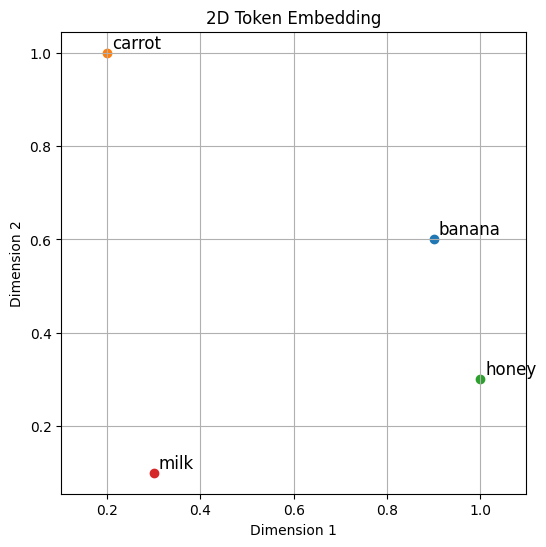

In [2]:
# 1 Plot the token embeddings on a two-dimensional plane.

# First I create a dictionary of the words and their embeddings
dc_words = {
    "banana": torch.tensor([0.9, 0.6]),
    "carrot": torch.tensor([0.2, 1.0]),
    "honey": torch.tensor([1.0, 0.3]),
    "milk": torch.tensor([0.3, 0.1]),
}

# Next I plot the data
plt.figure(figsize=(6, 6))
for t, v in dc_words.items():
    x, y = v.tolist()
    plt.scatter(x, y)
    plt.text( x + 0.01, y + 0.01, t, fontsize=12)

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("2D Token Embedding")
plt.grid(True)
plt.axis('equal')

1. Plot the token embeddings on a two-dimensional plane. Do the dimensions seem interpretable, or are they just arbitrary?

- I find them to be rather arbitrary since there isn't much info in a 2 dimension plot and there are no words that are clearly closer or further apart
- Nevertheless, it is some type of visualization and one could perhaps say that honey and banana are more similar than honey and milk.

In [3]:
# 2. Given some input, the model outputs the hidden state h𝑡−1 = (0.4, 0.9). Calculate the dot product of the hidden state with each token embedding.
h_t_1 = torch.tensor([0.4, 0.9])

outputs = torch.zeros(4)
i = 0
for t, v in dc_words.items():
    dot_prod = torch.dot(h_t_1, v)
    outputs[i] = dot_prod
    print(f"Dot product of hidden state with embedding of {t}: {dot_prod}")


Dot product of hidden state with embedding of banana: 0.8999999761581421
Dot product of hidden state with embedding of carrot: 0.9799999594688416
Dot product of hidden state with embedding of honey: 0.6700000166893005
Dot product of hidden state with embedding of milk: 0.21000000834465027


![dd](figures/dot.jpeg)

In [4]:
# 3. Based on the previous result, apply the softmax function to obtain the probability distribu- tion over the four tokens in the vocabulary.
probabilities = softmax(outputs, dim=0)
probabilities

tensor([0.2914, 0.2362, 0.2362, 0.2362])

![d](figures/softmax.jpeg)

# Temperature Scaling and Probability Distributions (1 Point)

### 1. Apply the softmax function to convert these logits into a probability distribution (tempera- ture = 1). Write down the probabilities.


In [5]:
logits = torch.tensor([2.1, 1.7, 1.3, 0.8, 0.2])
probs = softmax(logits, dim=0)

probs

tensor([0.3934, 0.2637, 0.1768, 0.1072, 0.0588])

### 2. Apply the softmax function with a temperature of 0.25. Write down the probability distri- bution.


In [6]:
temp_025_logits = logits / 0.25
probs_025 = softmax(temp_025_logits, dim=0)
probs_025

tensor([8.0085e-01, 1.6169e-01, 3.2644e-02, 4.4179e-03, 4.0079e-04])

### 3. Apply the softmax function with a temperature of 1.6. Write down the probability distri- bution.


In [7]:
temp_16_logits = logits / 1.6
probs_16 = softmax(temp_16_logits, dim=0)
probs_16


tensor([0.3191, 0.2485, 0.1935, 0.1416, 0.0973])

![dd](figures/Softmax_temp.jpeg)

### 4. Draw a graph showing the probability distributions for all three cases.


![cc](figures/temp1.jpeg)
![cc](figures/temp025.jpeg)
![cc](figures/temp16.jpeg)

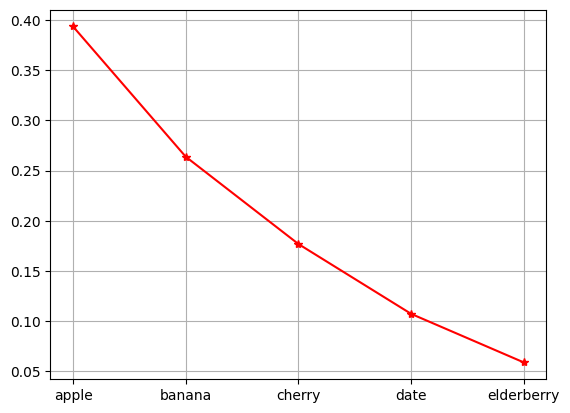

In [8]:
tokens = ['apple', 'banana', 'cherry', 'date', 'elderberry']

plt.plot(tokens, probs, marker='*', label="Temperature = 1", color='red')
plt.grid(True)

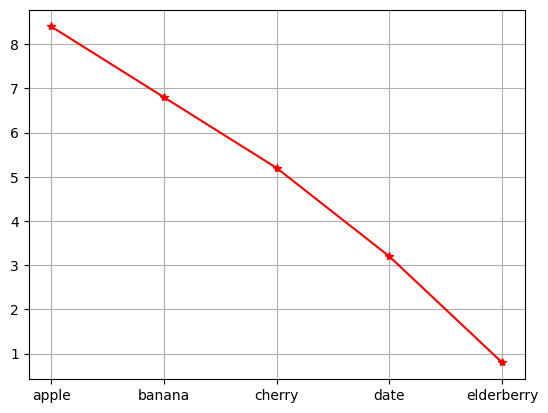

In [9]:
plt.plot(tokens, temp_025_logits, marker='*', label="Temperature = 0.25", color='red')
plt.grid(True)

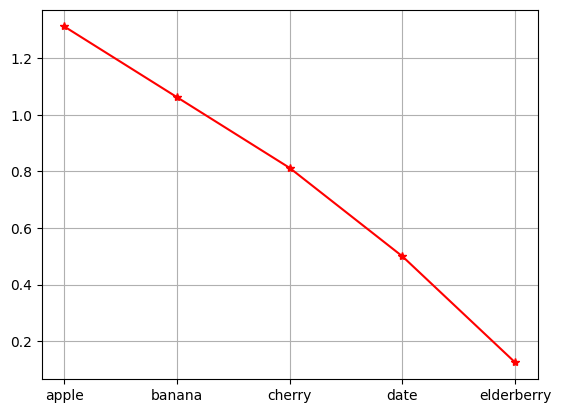

In [10]:
plt.plot(tokens, temp_16_logits, marker='*', label="Temperature = 1.6", color='red')
plt.grid(True)

### 5. Discuss your findings: How does temperature influence the probability distribution? What are the implications for text generation?

When T < 1:
- The distribution get sharper, so already higher probabilities get even higher
- This also means that the model becomes more confident and there is less diversity
- When a LLM generates text with the same prompt, it will always output the same text, since the distribution is so peaked

When T > :
- The distribution gets flatter and the differences get smoothed 
- There is more diversity and the model becomes more uncertain
- When a LLM generates text with the same prompt, it will always output a different text, since the distribution is so flattened

# Sampling Strategies (1 Point)

A language model predicts the following probability distribution given the context “The best way to start my morning is with ...”:

### Complete the sentence using the following sampling strategies and explain which tokens could be generated and why:

1. Greedy decoding -- “The best way to start my morning is with *coffee*” -- It chooses the token with the highest probability
2. Random sampling -- “The best way to start my morning is with *tea*” -- The word is chosen weighted by their probability so 'coffee' has a 50% chance to be chosen, 'tea' a 25% chance...
3. Top-𝑘 sampling with 𝑘 = 4 -- coffee has 32% chance to be choosen, tea 25%, juice 23% and water 21%
4. Top-𝑘 sampling with 𝑘 = 1 -- “The best way to start my morning is with *coffee*” -- It chooses the token with the highest probability like greedy decoding
5. Top-𝑝 sampling with 𝑝 = 0.8 -- coffee has a change of 40% to follow the sentence, tea 31% and juice 28%
6. Top-𝑝 sampling with 𝑝 = 0.2 --  “The best way to start my morning is with *coffee*” -- It chooses the token with the highest probability like greedy decoding, since the cut off point is 0.2 and the first token's probability is already over that.

![dd](figures/Sampling.jpeg)

# Discussion of Top-p & Top-k Sampling (0.5 Points)

In the class, we discussed some shortcomings of top-𝑘 sampling and introduced top-𝑝 sampling as an alternative.

1. What is an advantage of top-𝑝 sampling over top-𝑘 sampling?
With the Top-k sampling method, always the same k tokens are chosen, without regarding the probability distribution. However with the Top-P method tokens are dynamically chosen with the smallest possible set of cummulative probabilities that add up to the given p.
The second option is, thereby, more context-sensitive and flexible

# Discussion of Greedy Decoding vs. Sampling Strategies (0.5 Points)

1. Think about one application where greedy decoding and one where a sampling strategy would be the best approach for an application. Explain your answers. (Be creative for the sampling example and don’t just write "a language model for a chatbot...")

### Greedy Decoding: Auto-generated instruction for IT problems from text prompt in a customer service tool on a business' website
- One wants to garantee that the same anwsers get returned each time to ensure consistency regarding how the LLM tool helps customers with IT problems
- Often for specific IT problems that often come up, there is one main way to solve it.
- With Greedy Decoding always the same output is generated, since with each step the highest-probability token gets choosen

### Sampling strategy: AI nightstory teller
- One wants the stories to be creative and different each time
- With Sampling the text continuations are ensured to be more unexpected, since not always the same outputs are chosen

# Advanced Sampling Methods (1 Point)

Complete the sentence using the following sampling strategies and explain which tokens could be generated and why:

1. Epsilon sampling with 𝜀 = 0.001
2. Eta sampling with 𝜀 = 0.001 and 𝜋 = 0.8 (simplified version introduced in the class)


![cc](figures/Advanced_Sampling.jpeg)